In [1]:
from aux_functions import *

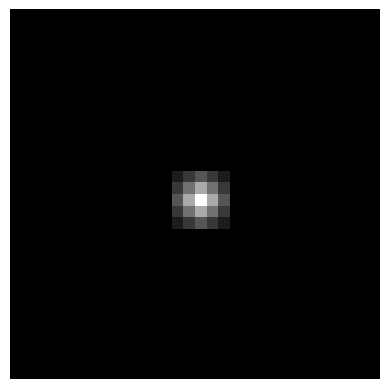

True

In [6]:
'''
Deco en ppio tiene flow_x, flow_y, residual_image y reference_image
'''

flow_x_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian/flow_x.npy'
flow_y_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian/flow_y.npy'
residual_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian/motion_corrected_difference.png'
ref_image_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian/DCM_reference_image.png'

# Cargar los archivos flow_x.npy y flow_y.npy
flow_x = np.load(flow_x_path)
flow_y = np.load(flow_y_path)

# Combinar los componentes x e y para obtener la variable flow
flow = np.stack((flow_x, flow_y), axis=-1)

# Leo imágenes de referencia y residual
ref_image = cv2.imread(ref_image_path, cv2.IMREAD_GRAYSCALE).astype(np.int16)
residual_image = cv2.imread(residual_path, cv2.IMREAD_GRAYSCALE).astype(np.int16)

#Calculo la suma entre ambas, resto 128 por offset de imagen residual
added_images = residual_image - 128 + ref_image

#Ploteo resultado
plt.imshow(added_images, cmap='gray')
plt.axis('off')  # Ocultar ejes
plt.show()

#Guardo resultado
output_path =  '/Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian/decoded_image_without_motion_correction.png'
cv2.imwrite(output_path, added_images)


In [11]:
def decoder_motion_correction(current_frame_path, reference_frame_path, flow_x_path, flow_y_path, output_path):
    
    curr_frame = cv2.imread(current_frame_path)
    prev_frame = cv2.imread(reference_frame_path)
    

    # Convertir las imágenes a escala de grises
    curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

    # Cargar los archivos flow_x.npy y flow_y.npy
    flow_x = np.load(flow_x_path)
    flow_y = np.load(flow_y_path)

    # Combinar los componentes x e y para obtener la variable flow
    flow = np.stack((flow_x, flow_y), axis=-1)


    # Aplicar el flujo óptico al segundo frame
    corrected_frame = np.zeros_like(curr_gray)
    # corrected_frame = curr_gray
    for y in range(flow.shape[0]):
        for x in range(flow.shape[1]):
            dx, dy = flow[y, x]
            x2 = min(max(x + dx, 0), flow.shape[1] - 1)
            y2 = min(max(y + dy, 0), flow.shape[0] - 1)
            corrected_frame[int(np.trunc(y2)), int(np.trunc(x2))] = curr_gray[y, x]

    #Alternativa para manejar sectores sin cubrir
    # corrected_frame_npwhere_reference_based = corrected_frame.copy()

    # for i in range(corrected_frame.shape[0]):
    #     for j in range(corrected_frame.shape[1]):
    #         corrected_frame_npwhere_reference_based[i][j] = np.where(corrected_frame_npwhere_reference_based[i][j] == 0, prev_gray[i][j], corrected_frame_npwhere_reference_based[i][j])

    cv2.imwrite(output_path, corrected_frame)


    print(f"Current frame con motion correction guardado como {output_path}")

    return

In [12]:
added_images_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian/decoded_image_without_motion_correction.png'

output_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian/decoder_motion_corrected_frame_npwhere_reference_based.png'

decoder_motion_correction(added_images_path, ref_image_path, flow_x_path, flow_y_path, output_path)

Current frame con motion correction guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian/decoder_motion_corrected_frame_npwhere_reference_based.png


In [13]:
current_frame_image = cv2.imread('/Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian/DCM_7x7_image.png')
estimated_frame_image = cv2.imread('/Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian/decoder_motion_corrected_frame_npwhere_reference_based.png')

print(np.sum(np.abs(current_frame_image-estimated_frame_image)))

0


In [ ]:
# Pruebo la decodificación con la imagen de referencia 

